In [1]:
import matplotlib.pyplot as plt
from termcolor import colored
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

color_pal = sns.color_palette("husl", 9)
plt.style.use('dark_background')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/PJME_hourly.csv')
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [3]:
df.tail()

,Datetime,PJME_MW
145361,2018-01-01 20:00:00,44284.0
145362,2018-01-01 21:00:00,43751.0
145363,2018-01-01 22:00:00,42402.0
145364,2018-01-01 23:00:00,40164.0
145365,2018-01-02 00:00:00,38608.0


In [4]:
# Setting Datetime column as index
df = df.set_index('Datetime')

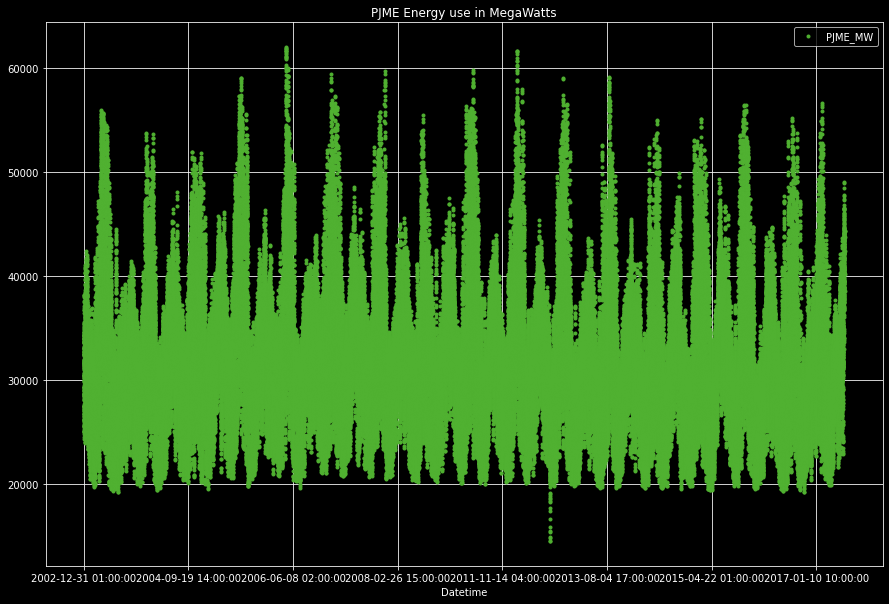

In [5]:
df.plot(style='.',figsize=(15,10),color=color_pal[3],title='PJME Energy use in MegaWatts')
plt.grid()

**We can see that the X axis labels are a little confusing to decipher, that because the datetime is probably set as object**

In [6]:
# Here we can see that the datetime is set as an object.
# So we will change it to datetime format
df.index

Index(['2002-12-31 01:00:00', '2002-12-31 02:00:00', '2002-12-31 03:00:00',
       '2002-12-31 04:00:00', '2002-12-31 05:00:00', '2002-12-31 06:00:00',
       '2002-12-31 07:00:00', '2002-12-31 08:00:00', '2002-12-31 09:00:00',
       '2002-12-31 10:00:00',
       ...
       '2018-01-01 15:00:00', '2018-01-01 16:00:00', '2018-01-01 17:00:00',
       '2018-01-01 18:00:00', '2018-01-01 19:00:00', '2018-01-01 20:00:00',
       '2018-01-01 21:00:00', '2018-01-01 22:00:00', '2018-01-01 23:00:00',
       '2018-01-02 00:00:00'],
      dtype='object', name='Datetime', length=145366)

In [7]:
df.index = pd.to_datetime(df.index)

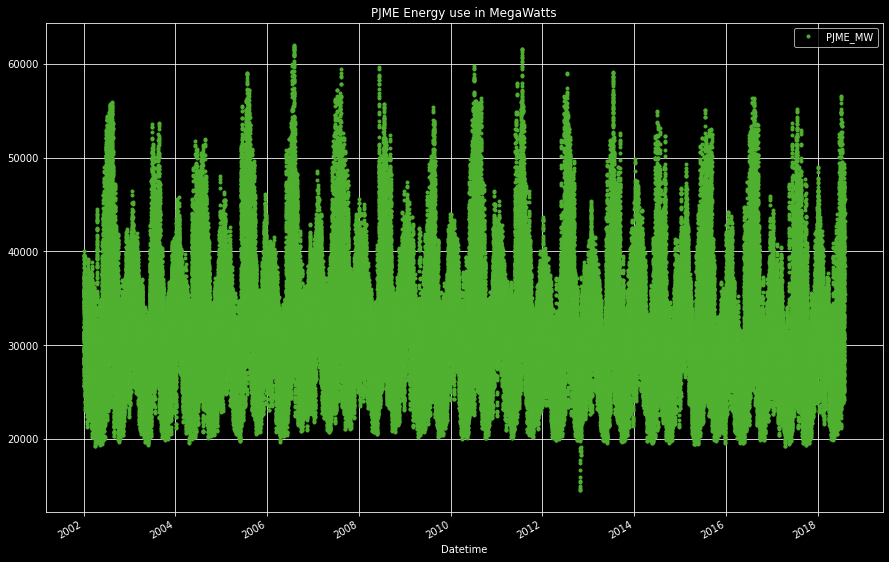

In [8]:
df.plot(style='.',figsize=(15,10),color=color_pal[3],title='PJME Energy use in MegaWatts')
plt.grid()

We can see that the X axis is a little easier to read .

# Train / Test Split

So we are gonna split the data by Jan 2015 by which i mean that for training i will use all the data up until Jan 2015 and the rest in the test set .

In [9]:
# Train contains all the values up until Jan 2015
# Test contains all the values from Jan 2015 
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >='01-01-2015']


Plotting the training and testing data.

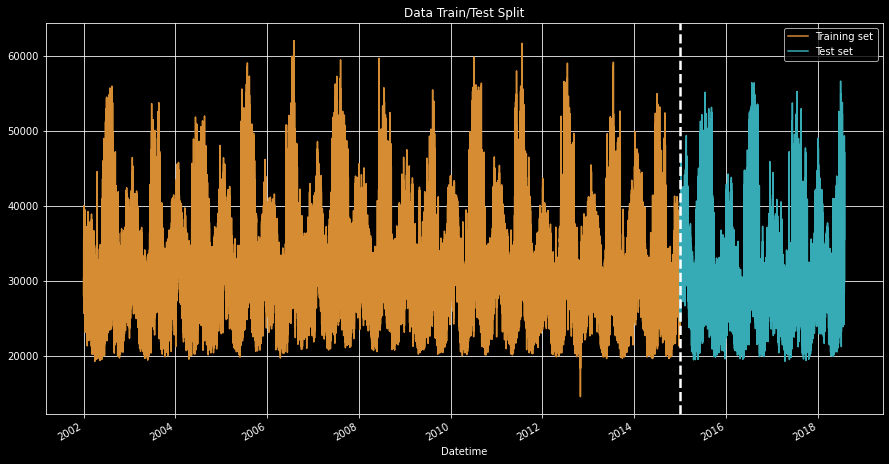

In [10]:
fig,ax = plt.subplots(figsize=(15,8))
train.plot(ax=ax,color=color_pal[1],label='Training set', title='Data Train/Test Split')
test.plot(ax=ax,color=color_pal[5],label='Test set')
ax.axvline('01-01-2015',color='white',ls='--',lw=2.5)
ax.legend(['Training set','Test set'])
plt.grid()

**So we can see orange indicates training set and blue indicates test set, also we can see where the data was split by the white vertical line .**

<AxesSubplot:title={'center':'Data of a Week'}, xlabel='Datetime'>

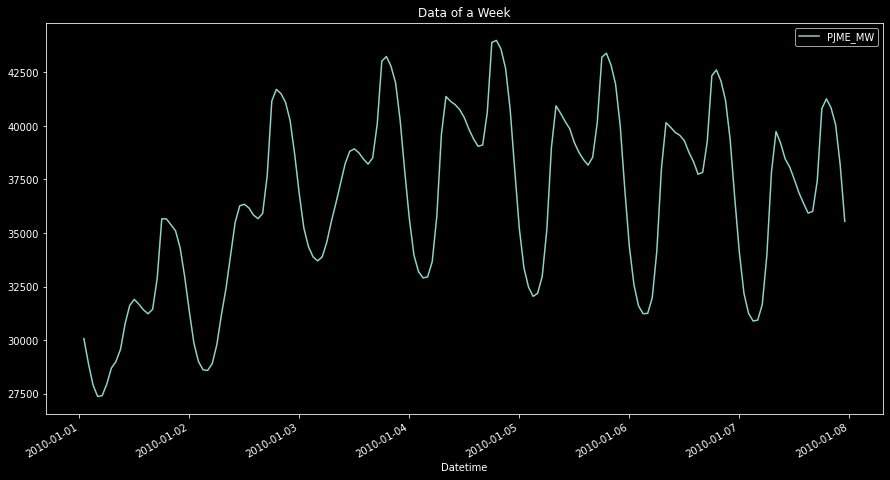

In [11]:
# let us also take a look at what a single week of data looks like.
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')].plot(figsize=(15,8),title='Data of a Week')

**Feature Creation**

Creating features such as month year hour etc from date time for our model .

In [12]:
def create_features(df):
    '''
    Create timeseries features based on time series index
    
    '''
    df['Hour'] = df.index.hour
    df['Dayofweek'] = df.index.day_of_week
    df['Quarter'] = df.index.quarter
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['Dayofyear'] = df.index.day_of_year
    return df

In [13]:
df = create_features(df)

In [14]:
df.head()

,PJME_MW,Hour,Dayofweek,Quarter,Month,Year,Dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365


# Visualize feature / target relatonship .

Text(0.5, 1.0, 'MegaWatts Usage by Hours')

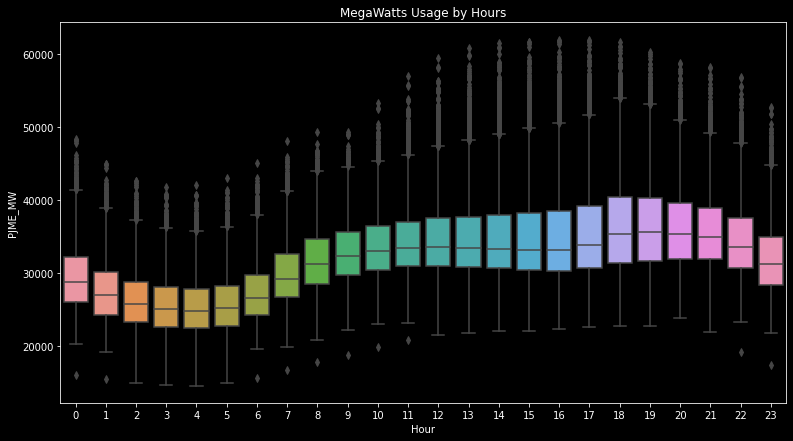

In [15]:
# We are going to use boxplots for this
fig, ax = plt.subplots(figsize=(13,7))
sns.boxplot(data=df,x='Hour',y='PJME_MW',ax=ax)
ax.set_title('MegaWatts Usage by Hours')

Text(0.5, 1.0, 'MegaWatts Usage by Month')

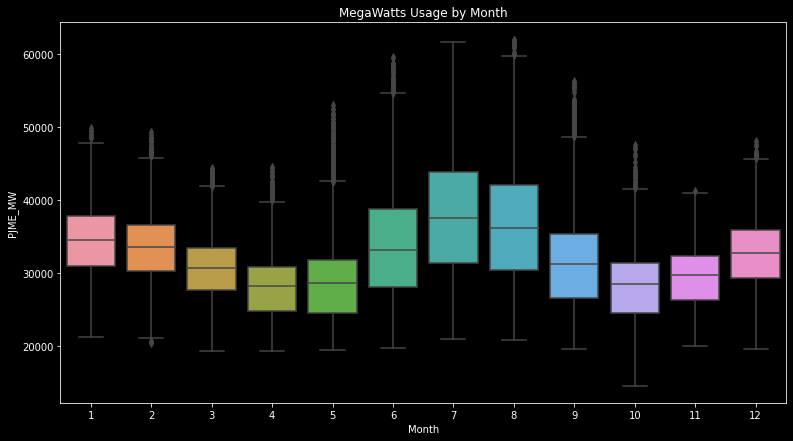

In [16]:
fig, ax = plt.subplots(figsize=(13,7))
sns.boxplot(data=df,x='Month',y='PJME_MW',ax=ax)
ax.set_title('MegaWatts Usage by Month')

Text(0.5, 1.0, 'MegaWatts Usage by Year')

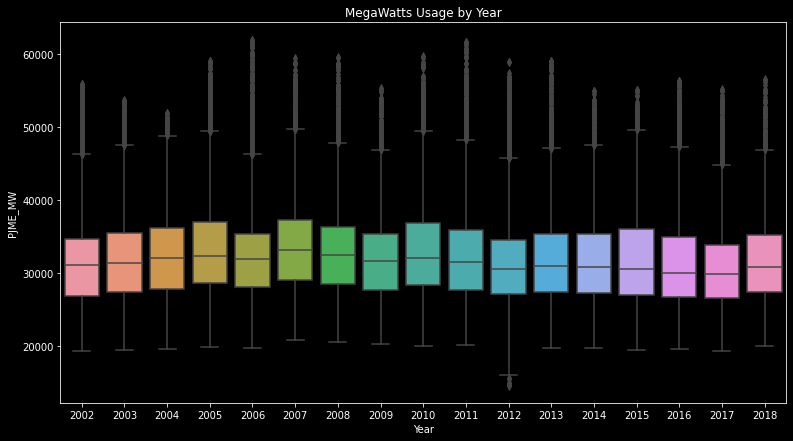

In [17]:
fig, ax = plt.subplots(figsize=(13,7))
sns.boxplot(data=df,x='Year',y='PJME_MW',ax=ax)
ax.set_title('MegaWatts Usage by Year')

In [18]:
# Creating features for our train and test data set.
train = create_features(train)
test = create_features(test)
FEATURES = ['Hour', 'Dayofweek', 'Quarter', 'Month', 'Year','Dayofyear']
TARGET = ['PJME_MW']

In [19]:
# Train set
X_train = train[FEATURES]
Y_train = train[TARGET]

# Test set
X_test = test[FEATURES]
Y_test = test[TARGET]

In [20]:
print(colored(X_train.shape,'red',attrs=['bold']))
print(colored(Y_train.shape,'red',attrs=['bold']))

(113926, 6)
(113926, 1)


# Model Creation 

In [21]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [22]:
reg = xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds=50,learning_rate=0.01)
reg.fit(X_train,Y_train,eval_set=[(X_train,Y_train),(X_test,Y_test)],verbose=100)

[22:23:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:32601.85156	validation_1-rmse:31654.29688
[100]	validation_0-rmse:12342.12793	validation_1-rmse:11517.66113
[200]	validation_0-rmse:5373.33008	validation_1-rmse:5165.30664
[300]	validation_0-rmse:3375.20654	validation_1-rmse:3829.25439
[400]	validation_0-rmse:2882.54785	validation_1-rmse:3715.04956
[500]	validation_0-rmse:2699.48804	validation_1-rmse:3756.65332
[600]	validation_0-rmse:2601.11987	validation_1-rmse:3806.77905
[700]	validation_0-rmse:2516.63574	validation_1-rmse:3845.80078
[800]	validation_0-rmse:2459.07056	validation_1-rmse:387

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=50,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

**Importance Features**

Basically we will see with the below code which features is most important to our model and it had been using most .

In [23]:
fea = pd.DataFrame(data=reg.feature_importances_,index=reg.get_booster().feature_names,columns=['Importance'])

In [24]:
fea

,Importance
Hour,0.432548
Dayofweek,0.115134
Quarter,0.049367
Month,0.245314
Year,0.029161
Dayofyear,0.128476


<AxesSubplot:title={'center':'Feature Importance'}>

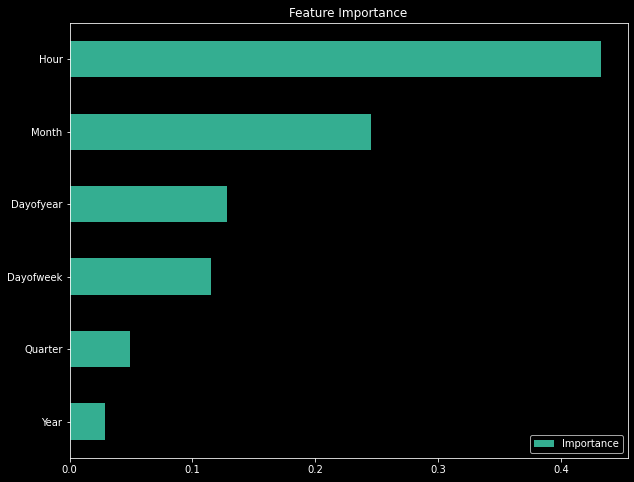

In [25]:
fig, ax = plt.subplots(figsize=(10,8))
fea.sort_values('Importance').plot(kind='barh',color=color_pal[4],title='Feature Importance',ax=ax)

# Forecast on Test Data.

In [26]:
test['Prediction'] = reg.predict(X_test)

**Now we will merge the predicted column of the test data set into the original dataset .**

In [27]:
df = df.merge(test['Prediction'], how='left',left_index=True,right_index=True)

In [28]:
df

,PJME_MW,Hour,Dayofweek,Quarter,Month,Year,Dayofyear,Prediction
Datetime,,,,,,,,
2002-01-01 01:00:00,30393.0,1,1,1,1,2002,1,NaN
2002-01-01 02:00:00,29265.0,2,1,1,1,2002,1,NaN
2002-01-01 03:00:00,28357.0,3,1,1,1,2002,1,NaN
2002-01-01 04:00:00,27899.0,4,1,1,1,2002,1,NaN
2002-01-01 05:00:00,28057.0,5,1,1,1,2002,1,NaN
...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,44057.0,20,3,3,8,2018,214,39994.914062
2018-08-02 21:00:00,43256.0,21,3,3,8,2018,214,38986.562500
2018-08-02 22:00:00,41552.0,22,3,3,8,2018,214,37515.148438


Text(0.5, 1.0, 'Raw Data and Prediction')

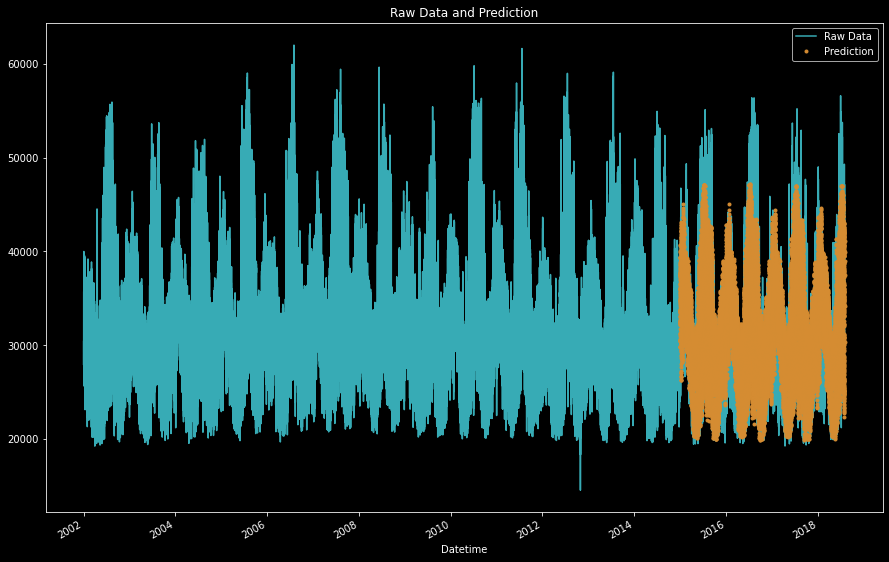

In [29]:
ax = df['PJME_MW'].plot(figsize=(15,10),color=color_pal[5])
df['Prediction'].plot(ax=ax, style='.',color=color_pal[1])
plt.legend(['Raw Data','Prediction'])
ax.set_title('Raw Data and Prediction')

**Check a weeks prediction.**

Now we will look take a look at original data and our prediction from the first week of the month of May.

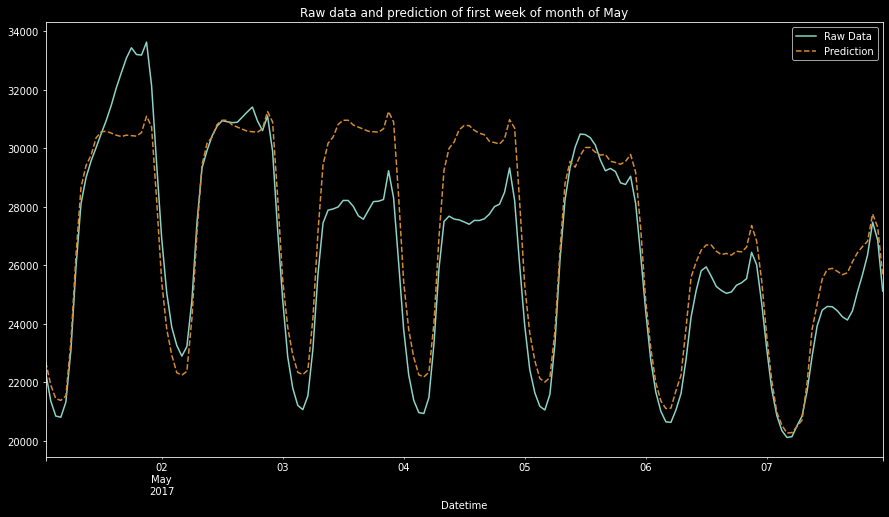

In [33]:
ax = df.loc[(df.index > '05-01-2017') & (df.index < '05-08-2017')]['PJME_MW'].plot(figsize=(15,8))
df.loc[(df.index > '05-01-2017') & (df.index < '05-08-2017')]['Prediction'].plot(ax=ax,style='--',color=color_pal[1])
ax.set_title('Raw data and prediction of first week of month of May')
plt.legend(['Raw Data','Prediction'])

**So we can see thats our model is not perfect but it is capturing some insights.We can use various methods to make it perfect.**

In [31]:
test

,PJME_MW,Hour,Dayofweek,Quarter,Month,Year,Dayofyear,Prediction
Datetime,,,,,,,,
2015-01-01 00:00:00,32802.0,0,3,1,1,2015,1,31702.228516
2015-12-31 01:00:00,24305.0,1,3,4,12,2015,365,29759.326172
2015-12-31 02:00:00,23156.0,2,3,4,12,2015,365,28601.472656
2015-12-31 03:00:00,22514.0,3,3,4,12,2015,365,27992.519531
2015-12-31 04:00:00,22330.0,4,3,4,12,2015,365,27927.343750
...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,20,0,1,1,2018,1,36763.316406
2018-01-01 21:00:00,43751.0,21,0,1,1,2018,1,36529.093750
2018-01-01 22:00:00,42402.0,22,0,1,1,2018,1,34887.187500


In [32]:
# Calculating the error
score = np.sqrt(mean_squared_error(test['PJME_MW'],test['Prediction']))
print(colored(f"RMSE Score on test data is : {score:0.3f}",'blue',attrs=['bold']))

RMSE Score on test data is : 3940.747
